# DailyBeer

In [1]:
import sqlite3
conn = sqlite3.connect("OrderAll.db")

## 1. Monthly  Total Amount Report

In [2]:
from pandas import Series, DataFrame

sql_cmd = """
select month, sum(total) as grandtotal
from OrderAll
group by month
order by month;
"""
cursor = conn.cursor()
cursor.execute(sql_cmd)
tuples = cursor.fetchall()

SR_Gtotal = Series([])


for tuple in tuples:
    SR_Gtotal = SR_Gtotal.set_value(int(tuple[0]), int(tuple[1]))
    print "{:>10}".format(tuple[0]), '월', "{:>12,}".format(tuple[1]),'원'

print SR_Gtotal.values
print SR_Gtotal.index

         7 월    8,474,601 원
         8 월    7,594,394 원
         9 월    6,673,702 원
        10 월    4,974,996 원
[8474601 7594394 6673702 4974996]
Int64Index([7, 8, 9, 10], dtype='int64')


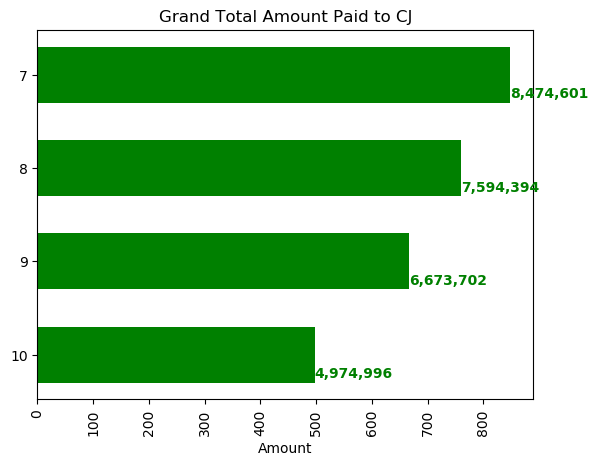

In [4]:
from itertools import cycle, islice
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

ind = np.arange(len(SR_Gtotal))
listtotal = SR_Gtotal.values
listindex = SR_Gtotal.index

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = listindex
y_pos = np.arange(len(listindex))
performance = listtotal
error = np.random.rand(len(listindex))

ax.barh(y_pos, performance, 0.6, align='center',
        color='green', ecolor='black')

for i, v in enumerate(listtotal):
    ax.text(v + 3, i + .25, "{:,}".format(v), color='green', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(listindex)
ax.set_xticklabels([0,100,200,300,400,500,600,700,800,900,1000], rotation=90)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel(u'Amount')
ax.set_title('Grand Total Amount Paid to CJ')

plt.show()

## 2. Monthly Products List  

In [45]:

for month_input in listindex:
    
    sql_cmd = """
    select month, sku, pname, sum(total) as gtotal, '원' as won, sum(qty) as qty, '개' as quantity
    from OrderAll
    where month = {} and year = 2017
    group by sku
    order by gtotal desc;
    """.format(month_input)

    cursor = conn.cursor()
    cursor.execute(sql_cmd)
    tuples = cursor.fetchall()

    msum = 0
    linebreak = 0
    for tuple in tuples:
        linebreak += 1
        #pname = tuple[2].replace("\n", "-")
        pname = tuple[2]
        msum += tuple[3]
    
        if (linebreak % 5) == 0:
            print ''
        print tuple[0], '월', tuple[1], pname[:10].ljust(10), '\t', "{:20,}".format(tuple[3]),'원', '\t\t', tuple[5],'개'
        SR_monthly_product = SR_monthly_product.set_value(pname[:10], tuple[3])
    print "="*64, 'Total Amount', "{:>12,}".format(msum), '원'
    print '\n\n'
    



7 월 424782 염지닭(생활맥주용  	           1,672,440 원 		28 개
7 월 424783 염지닭안심(생활맥주 	             683,100 원 		15 개
7 월 134356 심플로트 냉동감자( 	             602,580 원 		55 개
7 월 144398 심플로트 냉동감자( 	             557,172 원 		54 개

7 월 140440 심플로트 냉동감자( 	             476,036 원 		62 개
7 월 232931 반건오징어(생활맥주 	             354,000 원 		12 개
7 월 201934 소고기육포(생활맥주 	             349,360 원 		80 개
7 월 169394 샐러드믹스(생활맥주 	             345,600 원 		24 개
7 월 163815 이츠웰 골뱅이캔(자 	             344,960 원 		112 개

7 월 176689 소시지(생활맥주용  	             312,455 원 		65 개
7 월 116709 리코스 나쵸칩(45 	             267,960 원 		84 개
7 월 115722 사세통상 버팔로윙( 	             242,550 원 		21 개
7 월 124531 맥앤치즈볼(생활맥주 	             238,920 원 		60 개
7 월 116981 사세통상 버팔로윙스 	             226,380 원 		21 개

7 월 215140 양파드레싱(생활맥주 	             158,400 원 		16 개
7 월 118232 스팸 햄캔(마일드  	             138,600 원 		45 개
7 월 206578 길림양행 땅콩(껍질 	             138,600 원 		18 개
7 월 166412 뫼루니식품 물결무늬 	             115,720 원 		8 개
7 월 127454 파로 할라페뇨(슬라 	             102,850

10 월 159365 유니푸드 양념소금( 	               1,100 원 		1 개
================================================================ Total Amount    4,974,996 원





## 2. Monthly Product Details

## Group by SKU, MONTH

In [38]:
sql_cmd = """
select
        sku, pname,
        month,
        '월' as mon,
        sum(total) as gtotal,
        sum(qty) as qty,
        '개' as quantity
from OrderAll
group by sku, month
order by sku, month;
"""
cursor = conn.cursor()
cursor.execute(sql_cmd)
tuples = cursor.fetchall()

In [44]:
prev_sku = None
for tuple in tuples:
    #pname = tuple[1].replace("\n","-")
    pname = tuple[1]
    monthstring = str(tuple[2])+u'월'
    qtystring = str(tuple[5])+u'개' 
    eachmonth = [tuple[0], pname, monthstring, "{:>12,}원".format(tuple[4]), qtystring]
    
    if ( prev_sku != tuple[0]):
        print '='*90
        print ''
    prev_sku = tuple[0]
    print eachmonth[0], (eachmonth[1][:20]).ljust(30),'\t\t', eachmonth[2], '\t\t',eachmonth[3],'\t\t', eachmonth[4]
    
    
    


100353 백설 바삭튀김가루(1Kg/EA) 미국           		8월 		       2,750원 		1개
100353 백설 바삭튀김가루(1Kg/EA) 미국           		9월 		      13,750원 		5개

100743 코카콜라 콜라(캔_355ml 355g           		7월 		      68,112원 		4개
100743 코카콜라 콜라(캔_355ml 355g           		8월 		      68,112원 		4개
100743 코카콜라 콜라(캔_355ml 355g           		9월 		      34,056원 		2개
100743 코카콜라 콜라(캔_355ml 355g           		10월 		      34,056원 		2개

100744 스프라이트 사이다(355ml 355g           		7월 		      76,955원 		5개
100744 스프라이트 사이다(355ml 355g           		8월 		      76,955원 		5개
100744 스프라이트 사이다(355ml 355g           		9월 		      61,564원 		4개
100744 스프라이트 사이다(355ml 355g           		10월 		      46,173원 		3개

105409 아담스 파마산치즈파우더(1Kg/EA)           		7월 		      24,200원 		2개
105409 아담스 파마산치즈파우더(1Kg/EA)           		8월 		      12,100원 		1개

111308 천일식품 새우볶음밥(300g/EA)            		7월 		      23,309원 		13개
111308 천일식품 새우볶음밥(300g/EA)            		8월 		      17,930원 		10개
111308 천일식품 새우볶음밥(300g/EA)            		10월 		      17,930원 		10개

112371 칵테일냅킨(생활맥주용 10000장입  

In [26]:
print tuple[1]
def unicode_truncate(s, length, encoding='utf-8'):
    encoded = s.encode(encoding)[:length]
    return encoded.decode(encoding, 'ignore')
print unicode_truncate(tuple[1], 60)

백설 바삭튀김가루(1Kg/EA) 미국
※미국산
백설 바삭튀김가루(1Kg/EA) 미국
※미국산


In [5]:
 t1 = ( (1, 'p1', 'J', 20), (1, 'p1', 'A', 30),
        (2, 'p2', 'J', 10), (2, 'p2', 'A', 40), (2, 'p2', 'S', 50),
        (3, 'p3', 'J', 40),
        (4, 'p4', 'J', 10), (4, 'p4', 'A', 20), (4, 'p4', 'S', 40), (4, 'p4', 'O', 60)
      )

In [6]:
t1

((1, 'p1', 'J', 20),
 (1, 'p1', 'A', 30),
 (2, 'p2', 'J', 10),
 (2, 'p2', 'A', 40),
 (2, 'p2', 'S', 50),
 (3, 'p3', 'J', 40),
 (4, 'p4', 'J', 10),
 (4, 'p4', 'A', 20),
 (4, 'p4', 'S', 40),
 (4, 'p4', 'O', 60))

In [7]:
prev = None
for t in t1:
    if prev == t[0]:
        Flag = True
    d1 = {'p1':}

(1, 'p1', 'J', 20)
(1, 'p1', 'A', 30)
(2, 'p2', 'J', 10)
(2, 'p2', 'A', 40)
(2, 'p2', 'S', 50)
(3, 'p3', 'J', 40)
(4, 'p4', 'J', 10)
(4, 'p4', 'A', 20)
(4, 'p4', 'S', 40)
(4, 'p4', 'O', 60)
